<a href="https://colab.research.google.com/github/catabia/indeed/blob/main/walmart_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import math
from matplotlib import dates
import datetime
import pickle

#pandas!
pd.set_option('display.max_rows', 500) 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Minimum Wage dataset**

In [3]:
mw = pd.read_csv("/content/drive/MyDrive/hannah_research/data/target_walmart_min_wage.csv")

#dates!
mw['date'] = pd.to_datetime(mw['date'])
#mw.set_index(pd.DatetimeIndex(mw['date']))
mw['month_year'] = pd.to_datetime(mw['date']).dt.strftime('%Y-%m')
mw


,date,target,walmart,month_year
0,2012-01-01,7.25,7.25,2012-01
1,2012-02-01,7.25,7.25,2012-02
2,2012-03-01,7.25,7.25,2012-03
3,2012-04-01,7.25,7.25,2012-04
4,2012-05-01,7.25,7.25,2012-05
5,2012-06-01,7.25,7.25,2012-06
6,2012-07-01,7.25,7.25,2012-07
7,2012-08-01,7.25,7.25,2012-08
8,2012-09-01,7.25,7.25,2012-09
9,2012-10-01,7.25,7.25,2012-10


### **Min wage dictionary**
First by mw_region, then by month_year.

In [4]:
regions = mw.columns.to_list()

# get rid of date and month_year!
regions.remove('date')
regions.remove('month_year')

year_months = list(set(mw.month_year.to_list()))

mw_dict = {}

for region in regions:
  mw_dict[region] = {}
  for ym in year_months:
    mw_dict[region][ym] = mw.loc[mw.month_year == ym, region].iloc[0]




## **Review Dataset**

In [ ]:
# The entire reveiw set...

data = pd.read_csv("/content/drive/MyDrive/hannah_research/data/indeed_08_03_21.txt", sep ='\t')

#dates!
data['review_date'] = pd.to_datetime(data['review_date'])
data.set_index(pd.DatetimeIndex(data['review_date']))

data.shape

KeyboardInterrupt: ignored

In [ ]:
data.columns

Index(['platform', 'scrape_company_num', 'date_scraped', 'scrape_folder_name',
       'scrape_file_name', 'base_url', 'page_num', 'parent_company',
       'be_careful', 'company_name', 'scraped_from_url', 'empid', 'language',
       'id', 'review_url', 'uid', 'review_date', 'review_month', 'review_day',
       'review_year', 'parsable_loc', 'state', 'city', 'country', 'location',
       'job_title', 'norm_job_title', 'current', 'length_of_employment',
       'overall_rating', 'work_life_rating', 'compensation_rating',
       'job_security_rating', 'management_rating', 'culture_rating',
       'review_title', 'review_text', 'pros', 'cons', 'advice_to_management',
       'helpful_yes', 'helpful_no', 'recommend', 'ceo_approval',
       'business_outlook', 'redacted', 'is_deletable'],
      dtype='object')

In [ ]:
# Only looking at Washington state, Oregon, Illinois, Maryland at the moment

df = data[data.company_name.isin(['Walmart', 'Target'])]
df.shape
df.head


<bound method NDFrame.head of         platform  scrape_company_num  ... redacted is_deletable
2         Indeed                   1  ...        0            0
9         Indeed                   1  ...        0            0
11        Indeed                   1  ...        0            0
13        Indeed                   1  ...        0            0
16        Indeed                   1  ...        0            0
...          ...                 ...  ...      ...          ...
2400626   Indeed                   1  ...        0            0
2400631   Indeed                   2  ...        0            0
2400640   Indeed                   2  ...        0            0
2400646   Indeed                   1  ...        0            0
2400703   Indeed                   1  ...        0            0

[247257 rows x 47 columns]>

## **Job title clean-up (for review dataset)**

In [ ]:
# drop na in norm_job_title
df = df[df.norm_job_title.notna()]
df.shape

(246305, 47)

In [ ]:
jobs = df.norm_job_title.value_counts().to_frame().reset_index()
jobs.columns = ['norm_job_title', 'count']
jobs = jobs[jobs['count']>10]
print(jobs)

                           norm_job_title  count
0                                 Cashier  30011
1                         Sales Associate  17970
2    Customer Service Associate / Cashier  11190
3         Customer Service Representative  10309
4                                 Stocker  10217
..                                    ...    ...
528                            Dispatcher     11
529                     Associate Trainer     11
530                    Senior Sales Agent     11
531                        ICS Supervisor     11
532                     Software Engineer     11

[533 rows x 2 columns]


In [ ]:
remove = ['Specialist', 'Certified Trainer',
        'E-commerce Specialist', 'Senior Program Manager', 'Kitchen Designer',
         'Regional Manager', 'Appliance Technician',
         'Regional Sales Manager', 'Business Consultant',
         'Lead Technician',  'Field Technician',
         'Technical Project Manager', 'Regional Director', 'Senior Director',
          'Senior Inventory Analyst',  'Business Operations Manager', 
          'Mentor', 'Financial Specialist', 'Telecommunications Technician',
         'Tire Technician', 'Account Executive', 'Auditor','Director of Operations','Laboratory Technician', 'Director of Marketing', 
          'Director of Human Resources', 'Technical Consultant', 'Director of Sales and Marketing', 'Human Resources Business Partner', 
          'Car Sales Executive', 'SAP Consultant', 'MD',
          'Data Center Technician', 'Genius']

'''
definitely=   ['Pharmacist', 'Staff Pharmacist', 'Tire Technician', 'Account Executive', 'Executive Assistant', 'Software Engineer',
              'Business Analyst', 'Optician','Engineer', 'Pharmacy Intern', 'Bookkeeper', 'Network Engineer', 'Senior Analyst', 'Auditor',
              'Chief Engineer', 'Financial Analyst', 'Senior Software Engineer', 'Developer', 'Senior Pharmacy Technician', 'Volunteer',
              'Senior Certified Pharmacy Technician', 'Director of Operations', 'Business Development Manager', 'Data Analyst',
              'Senior Business Analyst', 'Database Administrator','Software Test Engineer', 'Chief Engineer', 'Contractor', 'Senior Financial Analyst',
              'Laboratory Technician', 'Director of Marketing', 'Software Architect', 'Quality Assurance Engineer', 'Systems Administrator', 'Senior Developer',
              'Intern Manager', 'Software Developer', 'Computer Specialist', 'Systems Analyst', 'Pharmacy Technician Intern', 'Executive Administrative Assistant',
              'Director of Human Resources', 'Computer Technician', 'System Engineer', 'Senior Accountant', 'Technical Consultant', 'Director of Sales and Marketing',
              'Senior Network Engineer', 'Senior Operations Manager', 'Marketing Intern', 'Front End Developer', 'IT Project Manager', 'Software Development Intern',
              'Externship', 'Independent Contractor', 'Senior System Engineer', 'Senior Systems Analyst', 'Senior Engineer', 'Pharmacist in Charge', 'Owner',
              'Computer Consultant','Software Engineering Manager', 'Human Resources Supervisor', 'IT Analyst', 'Network Analyst', 'Operations Analyst', 
              'Senior Consultant', 'Network Technician', 'Network Technician', 'Human Resources Business Partner', 'Senior Quality Assurance Analyst',
              'Logistics Analyst', 'Emergency Room Technician', 'Senior Account Executive', 'Building Engineer', 'IT Technician', 'Billing Analyst',
              'Owner/Manager', 'Car Sales Executive', 'Test Engineer', 'Operations Intern', 'Web Developer', 'SAP Consultant', 'Store Owner', 'Network Specialist',
              'Security Engineer', 'IT Security Specialist', 'Network Administrator', 'Senior Technical Support', 'MD', '.NET Developer', 'Therapist',
              'Electrician', 'Principal Software Engineer', 'Optical Technician', 'Programmer Analyst', 'Performance Engineer' ]

maybe = ['Pharmacy Technician', 'Specialist', 'Certified Pharmacy Technician', 'Administrative Assistant', 'Office Assistant', 'Certified Trainer',
         'Quality Assurance Analyst', 'E-commerce Specialist', 'Pharmacy Assistant', 'Senior Program Manager', 'Kitchen Designer',
         'File Clerk/Office Assistant', 'Accounts Receivable Clerk', 'Mechanic', 'Accounts Payable Clerk', 'Quality Assurance Manager',
         'Regional Manager', 'Business Systems Analyst', 'Pharmacy Clerk', 'Product Owner', 'Maintenance Mechanic', 'Appliance Technician',
         'Security Guard', 'Regional Sales Manager', 'Maintenance Engineer', 'Data Center Technician', 'Genius', 'Business Consultant', 'Pricing Analyst',
         'Lead Technician', 'Quality Assurance Tester', 'Field Technician', 'Accounts Payable Specialist', 'Network Operations Technician', 
         'Development Operations Engineer', 'Technical Project Manager', 'Regional Director', 'OSP Engineer', 'Senior Director',
         'Diesel Mechanic','Rf Engineer', 'Senior Inventory Analyst', 'Automation Engineer', 'Business Operations Manager', 'Secretary',
         'Technical Analyst', 'Mentor', 'Optometric Assistant', 'Financial Specialist', 'Automotive Mechanic', 'Telecommunications Technician']
'''

#removed: technician, consultant, specialist, data, director

signal_words= ['Pharmacist', 'Pharmacy', 'Intern', 'Software', 'Engineer', 'Analyst', 'Optician', 'Opthometrist',
               'Bookkeeper', 'Network', 'Auditor', 'Developer', 'Volunteer', 'Business Development', 'Database',
               'Contractor', 'Computer', 'Systems', 'System', 'Owner', 'Human Resources', 'IT ', 'EMT', 'Data ',
               'Externship', 'Engineering', 'Operations', 'Development', 'Web ', 'MD', 'Therapist', 'Electrician', 'Optical',
               'Programmer', 'Mechanic', 'Regional', 'Security Guard', 'Genius', 'Technical', 'Optometric', 'Optometrist',
               'Anonymous', 'anonymous', 'Accountant', 'Accounts Receivable', 'Accounts Payable', 'Security Guard',
               'Quality Assurance', 'QA ', 'Optometric', 'Therapist', 'President']

In [ ]:
# loop through, delete row if you find a "signal word"
#df = df.reset_index()
print(df.shape)
counter = 0
to_drop = []
for i, row in df.iterrows():
  
    counter +=1
    #if counter == 5000:
      #break

    for word in signal_words:
      if word in row.norm_job_title:
          print(i)
          print(row.norm_job_title, ' | ', row.company_name)
          to_drop.append(i)

    if row.norm_job_title in remove:
          print(i)
          print(row.norm_job_title, ' | ', row.company_name)
          to_drop.append(i)


df = df.drop(to_drop)
print(df.shape)

Streaming output truncated to the last 5000 lines.
Pharmacy Technician  |  Walmart
1863717
Pharmacy Technician  |  Walmart
1863887
Pharmacy Technician  |  Walmart
1863936
Technical Support Specialist  |  Walmart
1864118
Human Resources Manager  |  Target
1864612
Technical Support Specialist  |  Walmart
1865243
Pharmacy Technician  |  Walmart
1865346
Pharmacy Technician  |  Walmart
1865380
Specialist  |  Walmart
1865576
Pharmacy Technician  |  Walmart
1865592
Human Resources Assistant  |  Target
1865617
Operations Manager  |  Walmart
1865661
E-commerce Specialist  |  Walmart
1865695
Optician  |  Walmart
1865730
Accountant  |  Walmart
1865991
Pharmacy Technician  |  Walmart
1866557
Pharmacy Technician  |  Walmart
1866747
Pharmacy Clerk  |  Walmart
1866954
Pharmacy Technician  |  Walmart
1867152
Certified Pharmacy Technician  |  Walmart
1867317
Developer  |  Target
1867673
Specialist  |  Walmart
1867710
Tire Technician  |  Walmart
1868605
Pharmacy Technician  |  Target
1869104
Certified P

# **CHECKPOINT!! (Review dataset)**

In [5]:
# **CHECKPOINT!!**

#df.to_pickle("/content/drive/MyDrive/hannah_research/data/walmart_target_indeed.pkl")

df = pd.read_pickle("/content/drive/MyDrive/hannah_research/data/walmart_target_indeed.pkl")
df.shape

(235972, 47)

## **Month-year and date restrictions (review dataset)**

In [6]:
df['month_year'] = pd.to_datetime(df['review_date']).dt.strftime('%Y-%m')

In [7]:
df = df[df.review_year>=2012]
#df = df[df.review_year < 2020]
df.shape

(235695, 48)

# **RESTRICT TO CURRENT**

In [ ]:
print(df.shape)
nc_df = df[df.current==0]
df = df[df.current==1]
print(df.shape)
print(nc_df.shape)

(235695, 48)
(59312, 48)
(176383, 48)


## **Minimum wage changes**

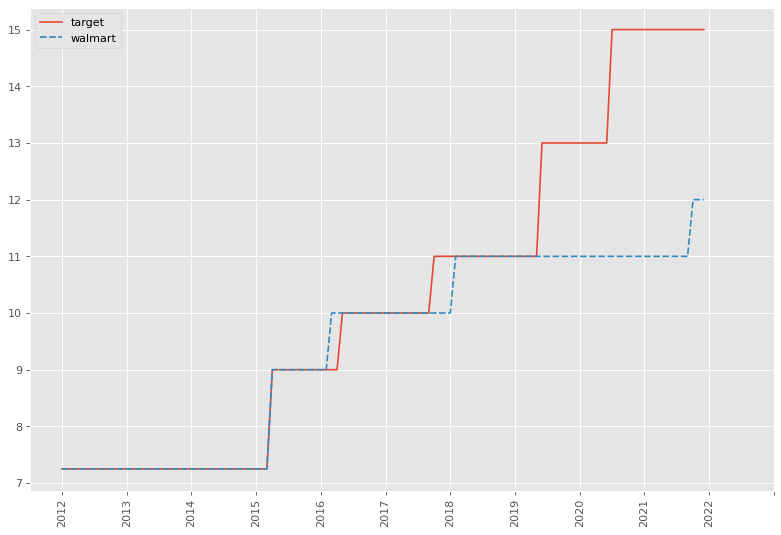

In [9]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=mw,)
plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])
plt.tick_params(axis='x', rotation=90)

## **Number of reviews by company**

### All states



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


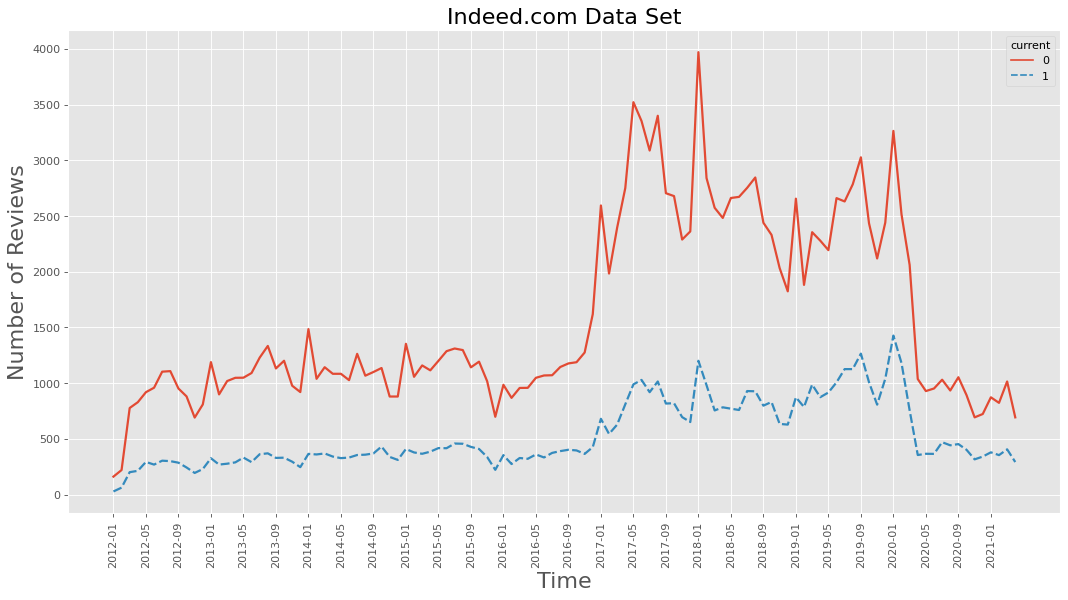

In [10]:
data_viz = df[['month_year', 'current']]
data_viz = data_viz.groupby(['month_year', 'current']).size().reset_index(name='count')

figure(figsize=(16, 8), dpi=80)
sns.lineplot(data=data_viz, x='month_year', y='count', hue = 'current', linewidth=2, style = 'current')
plt.title("Indeed.com Data Set", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)

ax = plt.axes()
ax.set_xticks(ax.get_xticks()[::4])

plt.tick_params(axis='x', rotation=90)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


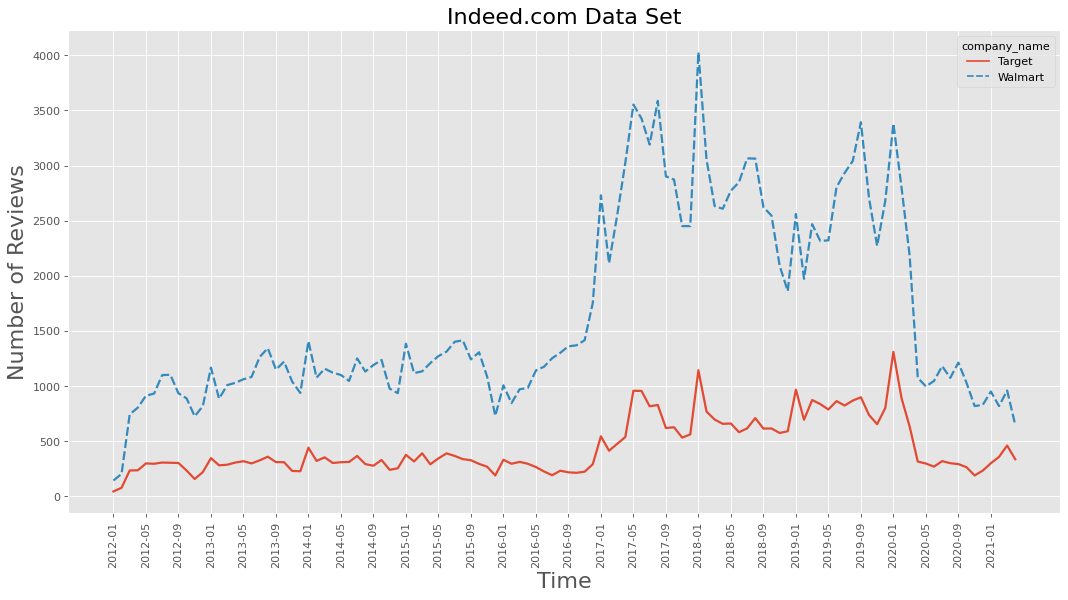

In [11]:
data_viz = df[['month_year', 'company_name']]
data_viz = data_viz.groupby(['month_year', 'company_name']).size().reset_index(name='count')

figure(figsize=(16, 8), dpi=80)
sns.lineplot(data=data_viz, x='month_year', y='count', hue = 'company_name', linewidth=2, style = 'company_name')
plt.title("Indeed.com Data Set", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)

ax = plt.axes()
ax.set_xticks(ax.get_xticks()[::4])

plt.tick_params(axis='x', rotation=90)

## **Top jobs**

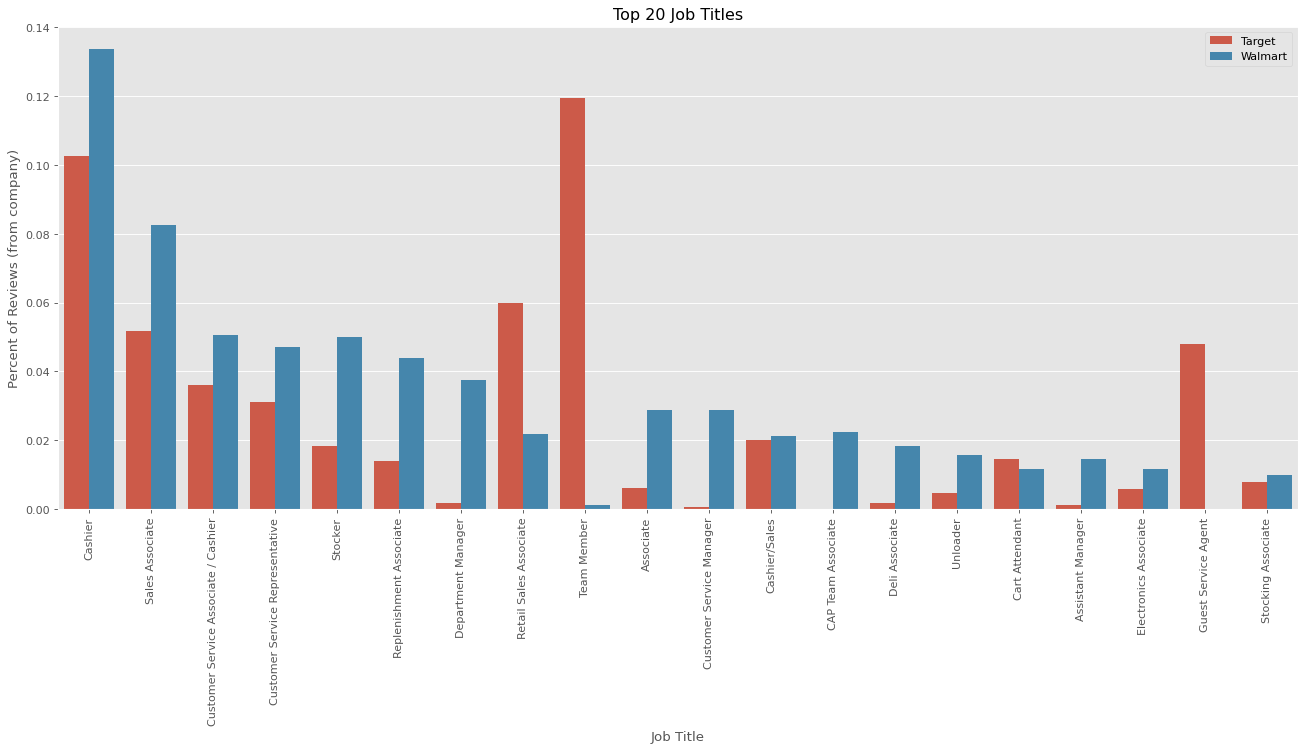

In [12]:
figure(figsize=(20,8), dpi=80)
top_jobs = df.norm_job_title.value_counts(normalize=True)[:20].index.tolist()
job_df = df[df.norm_job_title.isin(top_jobs)]


# number of reviews by region and job title
perc = job_df.groupby('company_name')['norm_job_title'].value_counts().astype(float)

# number of reviews in each region
total = df.company_name.value_counts().astype(float)

# divide by totals in region
for region in total.axes[0].tolist():
  for job in top_jobs:
    try:
      perc[region][job] = perc[region][job]/total[region]
    except:
      perc[region][job] =0


# undo multi-indexing
perc = perc.to_frame()
perc = perc.rename(columns={'norm_job_title':'percentage'})
perc = perc.reset_index()
#print(perc)

sns.barplot(data=perc, x='norm_job_title',y='percentage', hue = 'company_name', order = top_jobs)
#sns.countplot(data=job_df, x='norm_job_title', hue = 'state', order = top_jobs)
plt.title("Top 20 Job Titles")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Percent of Reviews (from company)')
plt.legend()

## **Average Rating**

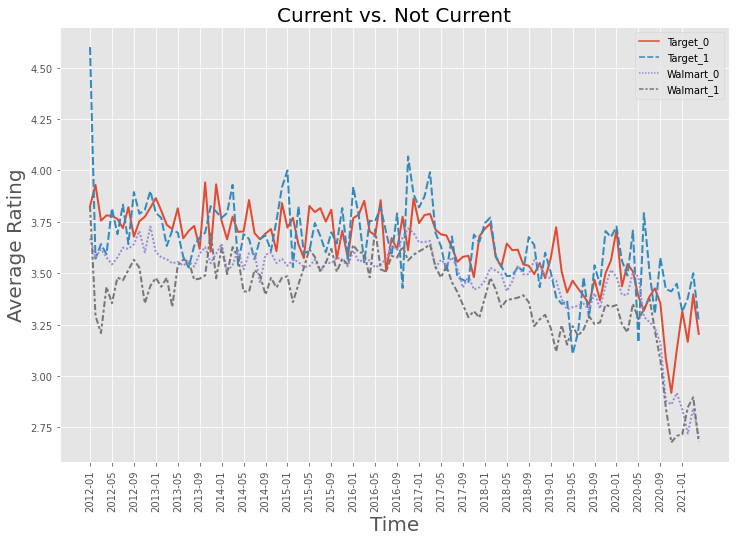

In [32]:
df["company_current"] = df.company_name.astype(str)+ '_' + df.current.astype(str)
domp = df.groupby(['month_year', 'company_current']).agg({'overall_rating':['mean', 'count']})
domp.columns = ['mean', 'count']
domp.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=domp, x='month_year', y='mean', hue='company_current',linewidth=2, style = 'company_current')
plt.title("Current vs. Not Current", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
plt.legend(title='')

ax.set_xticks(ax.get_xticks()[::4])

plt.tick_params(axis='x', rotation=90)

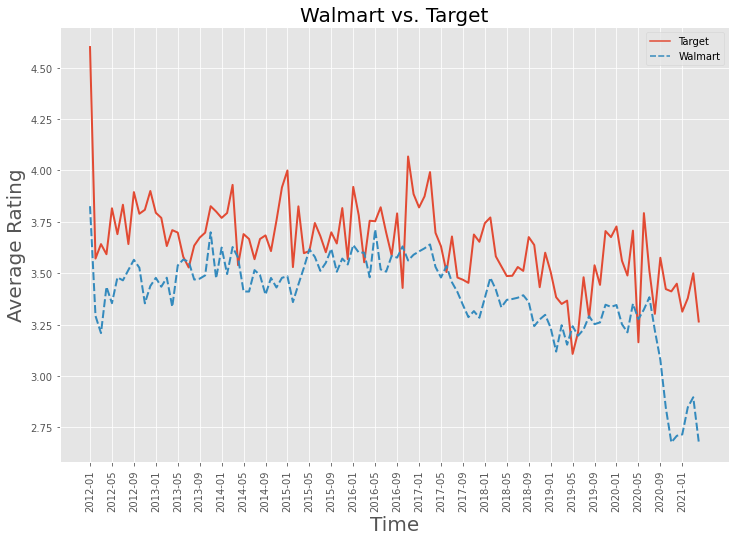

In [ ]:
domp = df.groupby(['month_year', 'company_name']).agg({'overall_rating':['mean', 'count']})
domp.columns = ['mean', 'count']
domp.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=domp, x='month_year', y='mean', hue='company_name',linewidth=2, style = 'company_name')
plt.title("Walmart vs. Target", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
plt.legend(title='')

ax.set_xticks(ax.get_xticks()[::4])

plt.tick_params(axis='x', rotation=90)

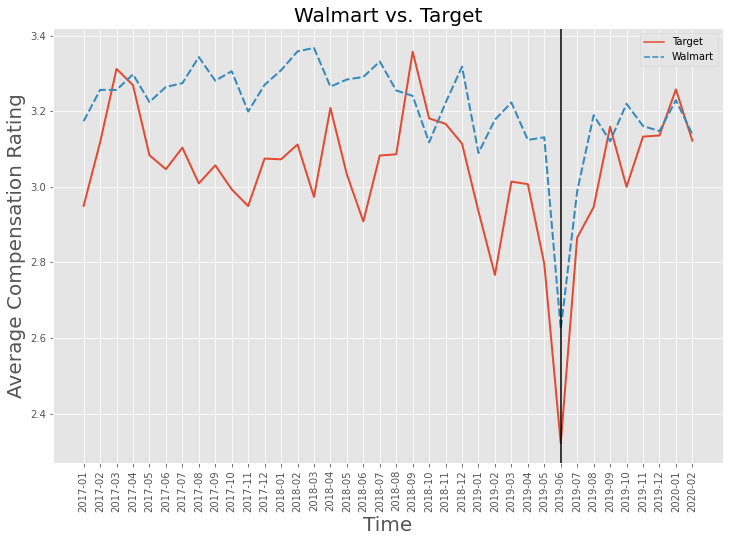

In [ ]:
womp = df.groupby(['month_year', 'company_name']).agg({'compensation_rating':['mean', 'count']})
womp.columns = ['mean', 'count']
womp.reset_index(inplace=True)

womp= womp[womp['month_year']>='2017-01']

womp= womp[womp['month_year']<='2020-02']

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=womp, x='month_year', y='mean', hue='company_name',linewidth=2, style = 'company_name')
plt.title("Walmart vs. Target", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Compensation Rating', fontsize=20)
plt.legend(title='')


plt.tick_params(axis='x', rotation=90)

plt.axvline(x=29, color = 'black')

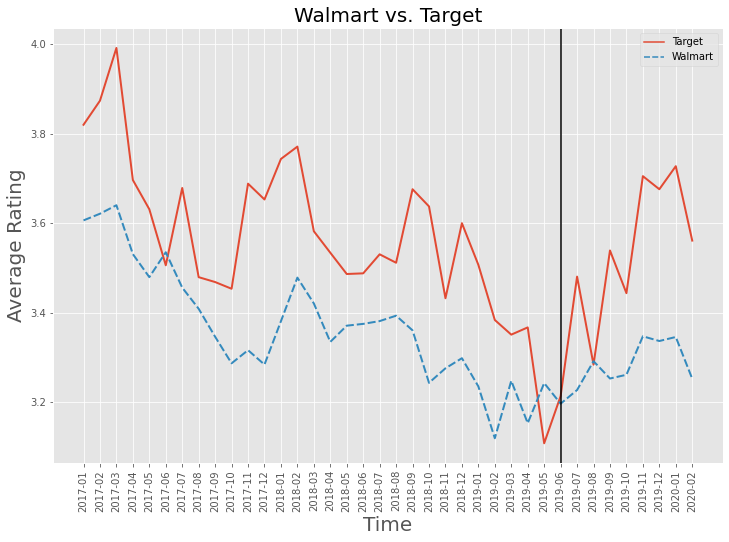

In [ ]:
domp= domp[domp['month_year']>='2017-01']

domp= domp[domp['month_year']<='2020-02']

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=domp, x='month_year', y='mean', hue='company_name',linewidth=2, style = 'company_name')
plt.title("Walmart vs. Target", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
plt.legend(title='')


plt.tick_params(axis='x', rotation=90)

plt.axvline(x=29, color = 'black')

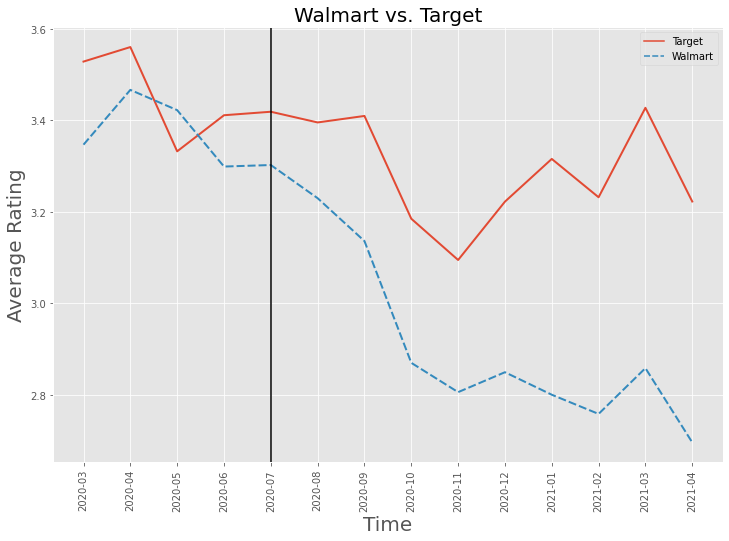

In [15]:
domp = df.groupby(['month_year', 'company_name']).agg({'overall_rating':['mean', 'count']})
domp.columns = ['mean', 'count']
domp.reset_index(inplace=True)

domp= domp[domp['month_year']>='2020-03']

domp= domp[domp['month_year']<='2021-05']

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=domp, x='month_year', y='mean', hue='company_name',linewidth=2, style = 'company_name')
plt.title("Walmart vs. Target", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
plt.legend(title='')


plt.tick_params(axis='x', rotation=90)

plt.axvline(x=4, color = 'black')

## **Creating NLP dataframe for RAs**

In [ ]:
# get rid of NaNs, which is only possible in the pro and con columns
df.pros = df.pros.replace(np.nan, '', regex=True)
df.cons = df.cons.replace(np.nan, '', regex=True)

#combine
df.text = df.review_title + ' ' + df.review_text + ' ' +  df.pros + ' ' + df.cons

#df.to_pickle("/content/drive/MyDrive/hannah_research/data/walmart_target_nlp.pkl")
df.columns


Index(['platform', 'scrape_company_num', 'date_scraped', 'scrape_folder_name',
       'scrape_file_name', 'base_url', 'page_num', 'parent_company',
       'be_careful', 'company_name', 'scraped_from_url', 'empid', 'language',
       'id', 'review_url', 'uid', 'review_date', 'review_month', 'review_day',
       'review_year', 'parsable_loc', 'state', 'city', 'country', 'location',
       'job_title', 'norm_job_title', 'current', 'length_of_employment',
       'overall_rating', 'work_life_rating', 'compensation_rating',
       'job_security_rating', 'management_rating', 'culture_rating',
       'review_title', 'review_text', 'pros', 'cons', 'advice_to_management',
       'helpful_yes', 'helpful_no', 'recommend', 'ceo_approval',
       'business_outlook', 'redacted', 'is_deletable', 'month_year'],
      dtype='object')

## **Creating R output**

In [ ]:

# columns to use
r = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating', 'management_rating', 'culture_rating',
             'review_date','review_year','month_year', 'company_name', 'norm_job_title', 'city', 'state']]


# pre vs. post
r['post'] = 0
mask = (r['review_date']>='06/01/2019')
r.post[mask]=1
print(r.columns)

# treatment location (Target)
r['treat_loc'] = 0
mask2 = (r['company_name'] == 'Target')
r.treat_loc[mask2] = 1

## cutoffs: 01-2017 through 02-2020
r= r[r['month_year']>='2017-01']
r= r[r['month_year']<='2020-02']

r.to_csv('/content/drive/MyDrive/hannah_research/data/target_walmart_rdf.csv', index=False)

r

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

Index(['overall_rating', 'work_life_rating', 'compensation_rating',
       'job_security_rating', 'management_rating', 'culture_rating',
       'review_date', 'review_year', 'month_year', 'company_name',
       'norm_job_title', 'city', 'state', 'post'],
      dtype='object')


,overall_rating,work_life_rating,compensation_rating,job_security_rating,management_rating,culture_rating,review_date,review_year,month_year,company_name,norm_job_title,city,state,post,treat_loc
158,4,4,2,2,2,2,2017-01-17,2017,2017-01,Walmart,Stocking Associate,Sandy Springs,GA,0,0
310,5,0,0,0,0,0,2019-07-25,2019,2019-07,Target,Warehouse Worker,Rialto,CA,1,1
384,5,4,3,5,4,5,2018-04-18,2018,2018-04,Target,Customer Service Associate / Cashier,Falls Church,VA,0,1
506,5,5,5,5,5,5,2017-02-08,2017,2017-02,Walmart,Inventory Associate,Saratoga Springs,NY,0,0
560,1,3,3,2,1,1,2018-10-21,2018,2018-10,Walmart,Cart Attendant,Council Bluffs,IA,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400317,5,4,5,5,4,4,2019-02-15,2019,2019-02,Walmart,MRA 1,Omaha,NE,0,0
2400347,3,2,3,2,3,3,2019-05-17,2019,2019-05,Walmart,CAP Team Associate,Booneville,AR,0,0
2400351,1,1,1,1,1,1,2019-06-11,2019,2019-06,Walmart,Sales Associate,Douglas,GA,1,0
2400369,4,4,4,5,3,3,2019-03-12,2019,2019-03,Target,Beauty Consultant,Thousand Oaks,CA,0,1


## **Creating SECOND R output**

In [36]:

# columns to use
r3 = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating', 'management_rating', 'culture_rating',
             'review_date','review_year','month_year', 'company_name', 'norm_job_title', 'city', 'state']]


# pre vs. post
r3['post'] = 0
mask = (r3['review_date']>='07/01/2020')
r3.post[mask]=1
print(r3.columns)

# treatment location (Target)
r3['treat_loc'] = 0
mask2 = (r3['company_name'] == 'Target')
r3.treat_loc[mask2] = 1

## cutoffs: 01-2020 through 04-2021
r3= r3[r3['month_year']>='2020-01']
r3= r3[r3['month_year']<='2021-04']

r3.to_csv('/content/drive/MyDrive/hannah_research/data/target_walmart_rdf3.csv', index=False)

r3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

Index(['overall_rating', 'work_life_rating', 'compensation_rating',
       'job_security_rating', 'management_rating', 'culture_rating',
       'review_date', 'review_year', 'month_year', 'company_name',
       'norm_job_title', 'city', 'state', 'post'],
      dtype='object')


,overall_rating,work_life_rating,compensation_rating,job_security_rating,management_rating,culture_rating,review_date,review_year,month_year,company_name,norm_job_title,city,state,post,treat_loc
13,4,4,5,5,5,5,2020-01-20,2020,2020-01,Walmart,Maintenance Person,Darlington,SC,0,0
72,2,2,4,2,2,2,2020-06-02,2020,2020-06,Walmart,Cashier/Sales,Northampton,MA,0,0
387,5,3,5,5,3,1,2020-01-26,2020,2020-01,Walmart,Cashier/Sales,Dearborn,MI,0,0
697,3,4,3,3,3,3,2021-01-14,2021,2021-01,Walmart,Grocery Associate,Platteville,WI,1,0
811,1,2,2,1,1,1,2021-04-08,2021,2021-04,Walmart,Sales Associate,Wauchula,FL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400287,5,5,5,5,5,5,2020-05-11,2020,2020-05,Target,Seasonal Associate,Miramar,FL,0,1
2400345,4,3,3,1,1,4,2020-10-18,2020,2020-10,Walmart,Department Manager,Murfreesboro,TN,1,0
2400357,4,3,3,3,3,3,2021-01-08,2021,2021-01,Target,Retail Sales Associate,Chantilly,VA,1,1
2400454,4,3,3,5,3,3,2021-01-26,2021,2021-01,Walmart,Copy Center Associate,New Philadelphia,OH,1,0


# **TO DOs**



1. Look at other firms
2. Redo location-based increases of min wage for current=1
3. Look at pandemic data for Target/Walmart
4. Look at Glassdoor data for Target/Walmart
5. Sam's Club!






